In [10]:
# testing if data loading is OK
import pandas as pd

# Read the CSV file
data = pd.read_csv('./data/train_transaction.csv')

# Show the contents
#print(df)
data.head()
#print(df.describe())

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
import seaborn as sns; sns.set() 
import matplotlib.pyplot as plt
%matplotlib inline
import math

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [3]:
# Only use the 'Amount' and 'V1', ..., 'V28' features
features = ['TransactionAmt'] + ['V%d' % number for number in range(1, 29)]
#print(features)

# The target variable which we would like to predict, is the 'Class' variable
target = 'isFraud'

# Now create an X variable (containing the features) and an y variable (containing only the target variable)
#X = data[features].dropna(how='any')
X = data[features].fillna(0)
#print(X)
#print(X.dropna(how='any'))
y = data[target]
#print(y)

#sns.jointplot('sepal_width', 'petal_length', data=X.dropna(how='any'))

In [4]:
X.tail()

,TransactionAmt,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
590535,49.00,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
590536,39.50,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
590537,30.95,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
590538,117.00,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
590539,279.95,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,2.0,2.0,1.0,1.0,0.0,0.0


<function matplotlib.pyplot.show>

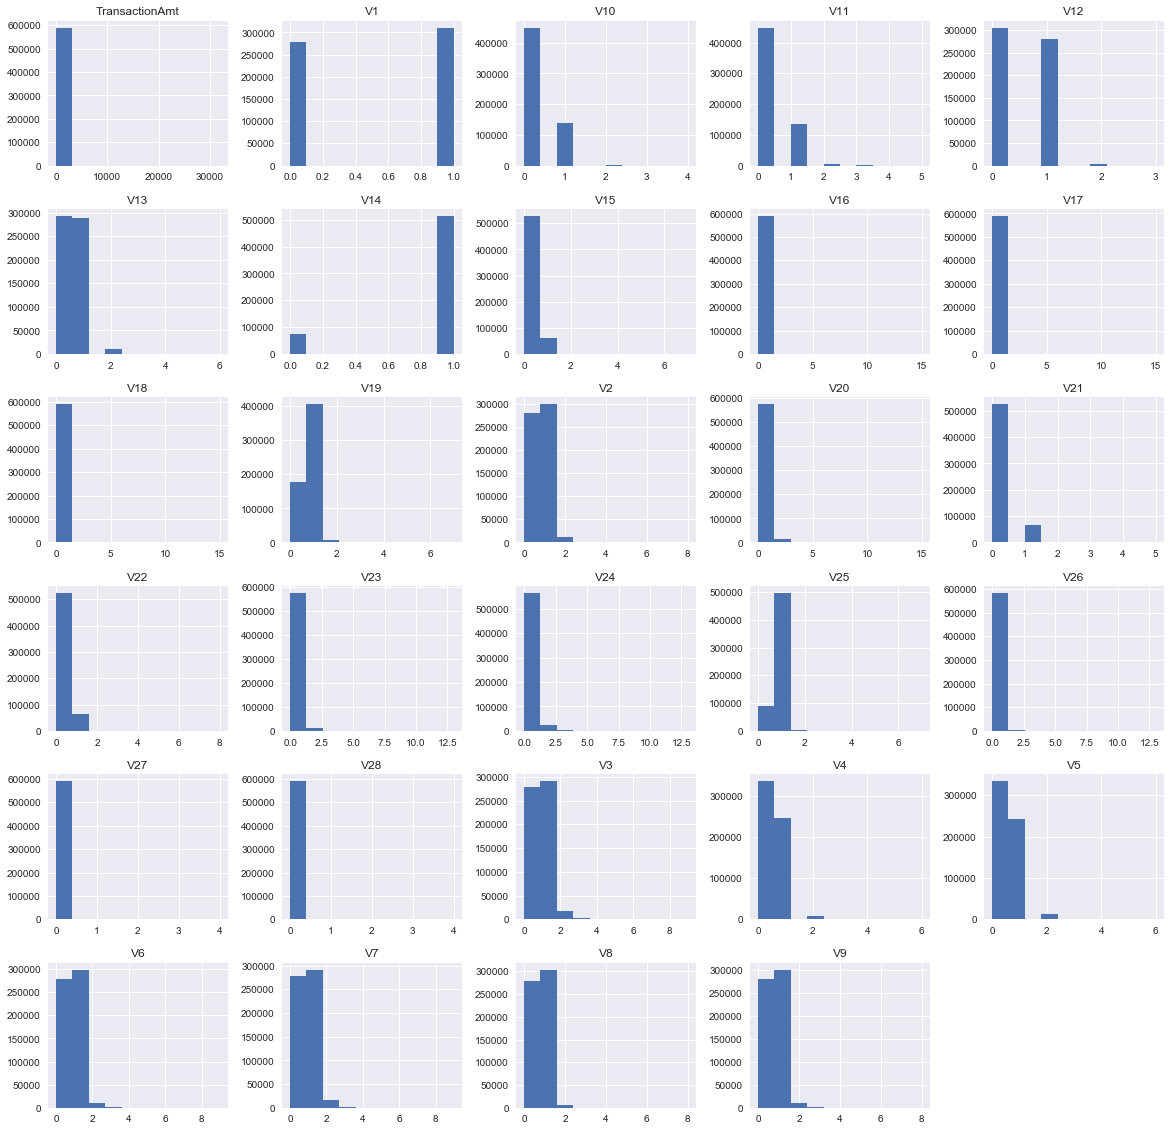

In [9]:
# histogram
X.hist(figsize = (20, 20))
plt.show

21


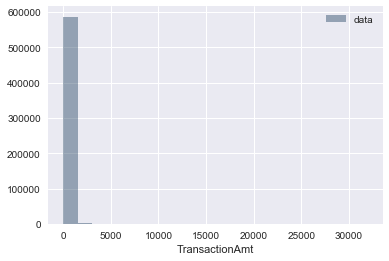

In [6]:
# histogram only for TransactionAmt
sturges = lambda n: math.ceil(math.log2(n*2))
bin_num = sturges(len(X['TransactionAmt']))
print(bin_num)
#bin_num = 4

sns.distplot(
    X['TransactionAmt'], bins=bin_num, color='#123456', label='data',
    kde=False,
    rug=False
)
plt.legend()
plt.show()  

In [7]:
def normalize(X):
    """
    Make the distribution of the values of each variable similar by subtracting the mean and by dividing by the standard deviation.
    """
    for feature in X.columns:
        X[feature] -= X[feature].mean()
        X[feature] /= X[feature].std()
    return X

In [8]:
# Define the model
model = LogisticRegression()

# Define the splitter for splitting the data in a train set and a test set
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=0)

# Loop through the splits (only one)
for train_indices, test_indices in splitter.split(X, y):
    #print(train_indices.shape)
    #print(test_indices.shape)
    #print(train_indices)
    # Select the train and test data
    X_train, y_train = X.iloc[train_indices], y.iloc[train_indices]
    X_test, y_test = X.iloc[test_indices], y.iloc[test_indices]
    
    # Normalize the data
    X_train = normalize(X_train)
    X_test = normalize(X_test)
    
    # Fit and predict!
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # And finally: show the results
    print(classification_report(y_test, y_pred))

/Users/ksaioji/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/ksaioji/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


             precision    recall  f1-score   support

          0       0.97      1.00      0.98    284939
          1       0.66      0.03      0.06     10331

avg / total       0.96      0.97      0.95    295270

